In [1]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataSQM/ciwarugaData.csv')
df.head()

,Waktu,Kecerahan,Temperature,Latitude,Longtitude
0,4.722867,9.4,29.299999,-6.860997,107.575356
1,14.767959,9.5,29.600000,-6.860997,107.575356
2,24.759052,9.5,29.299999,-6.860997,107.575355
3,34.753064,9.5,29.600000,-6.860997,107.575354
4,44.746738,9.5,29.600000,-6.860996,107.575353


In [3]:
df["Kecerahan"][1:5]

1    9.5
2    9.5
3    9.5
4    9.5
Name: Kecerahan, dtype: float64

In [4]:
df1 = pd.read_csv('./dataSQM/bngData.csv')
df1.head()

,Waktu,Kecerahan,Temperature,Latitude,Longtitude
0,6.336443,16.100000,23.799999,-6.923718,107.629217
1,16.330666,15.900000,23.799999,-6.953375,107.627381
2,26.325052,16.299999,23.799999,-6.953408,107.627416
3,36.318787,16.000000,23.799999,-6.953417,107.627443
4,46.359086,14.300000,23.799999,-6.953413,107.627440


In [5]:
df2 = pd.read_csv('./dataSQM/gatsuData.csv')
df2.head()

,Waktu,Kecerahan,Temperature,Latitude,Longtitude
0,8.125297,17.299999,28.600000,-6.925284,107.630834
1,18.113774,17.299999,28.299999,-6.925301,107.630913
2,28.149226,17.100000,28.600000,-6.925317,107.630985
3,38.139853,14.900000,28.299999,-6.925331,107.631067
4,48.128930,16.200001,28.600000,-6.925372,107.631176


In [18]:
m = folium.Map(location=[-2.003589,113.756127], zoom_start=5) #sudah cukup mengcover indonesia

pengukuran1 = MarkerCluster().add_to(m)
pengukuran2 = MarkerCluster().add_to(m)
pengukuran3 = MarkerCluster().add_to(m)

# for index, row in df.iterrows():
#     folium.Marker([row['Latitude'], row['Longtitude']], 
#                   popup=row['Kecerahan'],
#                   icon=folium.Icon(icon='cloud')).add_to(pengukuran1)

folium.Marker([df['Latitude'][5], df['Longtitude'][5]], 
                  popup="Survey 2",
                  icon=folium.Icon(icon='cloud')).add_to(pengukuran1)

for index, row in df1.iterrows():
    folium.Marker([row['Latitude'], row['Longtitude']], 
                  popup="Survey 2"+"\n Temperatur:"
                          +str(int(row['Temperature'])) +"\n Kecerahan: "
                          +str(row['Kecerahan']),
                  icon=folium.Icon(icon='cloud')).add_to(pengukuran2)
    
for index, row in df2.iterrows():
    folium.Marker([row['Latitude'], row['Longtitude']], 
                  popup="Survey 2"+"\n"+str(row['Temperature'])+"\n"+str(row['Kecerahan']),
                  icon=folium.Icon(icon='cloud')).add_to(pengukuran3)

In [19]:
m.save("./index3.html")

In [8]:
#Data Imahnoong
url = "http://twro.kabarlangit.com/data/20210418_imahnoong/2021-04-18_SQMdata.csv"

dfi = pd.read_csv(url)
dfi.head()

,time,magnitude,temperature,frequency
0,2021-04-18 01:00:00 +07:00,18.19,023.2,0000000004
1,2021-04-18 01:00:05 +07:00,18.19,023.2,0000000005
2,2021-04-18 01:00:10 +07:00,18.19,023.2,0000000005
3,2021-04-18 01:00:15 +07:00,18.19,023.2,0000000004
4,2021-04-18 01:00:20 +07:00,18.19,023.2,0000000005


# Gambar Grafik

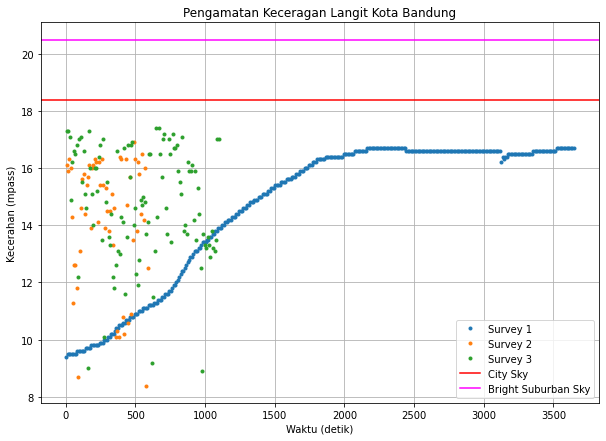

In [9]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(df["Waktu"],df["Kecerahan"],'.',label="Survey 1")
plt.plot(df1["Waktu"],df1["Kecerahan"],'.',label="Survey 2")
plt.plot(df2["Waktu"],df2["Kecerahan"],'.',label="Survey 3")

#plt.plot(dfi["magnitude"],'.',label="Survey ImahNong")

plt.title("Pengamatan Keceragan Langit Kota Bandung")

plt.axhline(18.38,c='red',label="City Sky")

plt.axhline(20.49,c='magenta',label="Bright Suburban Sky")


plt.xlabel("Waktu (detik)")

plt.ylabel("Kecerahan (mpass)")

plt.legend()

plt.grid()
plt.show()